In [68]:
#importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the census dataset
df=pd.read_csv("Data/census_2011.csv",usecols=["State name","District name","Population","Male","Female","Literate","Male_Literate","Female_Literate","Rural_Households","Urban_Households","Households","Age_Group_0_29","Age_Group_30_49","Age_Group_50","Age not stated"])

In [3]:
df.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [4]:
df.shape

(640, 15)

Rename the columns

In [5]:
new_names = {
    'State name':'State/UT',
    'District name': 'District',
    'Male_Literate': 'Literate_Male',
    'Female_Literate': 'Literate_Female',
    'Rural_Households': 'Households_Rural',
    'Urban_Households': 'Households_Urban',
    'Age_Group_0_29': 'Young_and_Adult',
    'Age_Group_30_49': 'Middle_Aged',
    'Age_Group_50': 'Senior_Citizen',
    'Age not stated': 'Age_Not_Stated'
}

In [6]:
df = df.rename(columns=new_names)

In [7]:
#Creating a copy of the dataframe
df_copy1=df.copy()

In [8]:
df_copy1.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


Capitalizing the data

In [9]:
states=[]
for i in range(len(df_copy1["State/UT"])):
    words = df_copy1["State/UT"][i].lower().split()
    words = [word if word == 'and' else word.capitalize() for word in words]
    state_name = ' '.join(words)
    states.append(state_name)

In [10]:
df_copy1["State/UT"] = states

In [11]:
df_copy1.sample(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
154,Uttar Pradesh,Hardoi,4092845.0,2191442.0,1901403.0,2221601.0,1374587.0,847014.0,786613.0,121064.0,907677.0,2598364.0,905306.0,559988.0,29187.0
152,Uttar Pradesh,Kheri,4021243.0,2123187.0,1898056.0,2034044.0,1237157.0,796887.0,754938.0,107672.0,NaN,2582597.0,896611.0,510832.0,31203.0
448,Madhya Pradesh,Hoshangabad,1241350.0,648725.0,592625.0,810644.0,469199.0,341445.0,209650.0,105746.0,315396.0,730768.0,318232.0,191501.0,849.0
208,Bihar,Araria,2811569.0,1463333.0,1348236.0,1195768.0,NaN,468125.0,NaN,44213.0,703274.0,1872943.0,612012.0,324091.0,2523.0
469,Gujarat,Patan,1343734.0,694397.0,649337.0,837913.0,494631.0,343282.0,301483.0,102655.0,404138.0,786357.0,341381.0,213465.0,2531.0


Reading another file telangana.txt and replacing State/UT from Andhra Pradesh to Telangana

In [12]:
df_telangana=pd.read_csv("Data/Telangana.txt",header=None)

In [13]:
df_telangana

,0
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


In [14]:
df_telangana=df_telangana.replace('Andhra Pradesh', 'Telangana')

In [15]:
df_telangana

,0
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


Reading first dataframe and changing state/UT from J&K to Laddakh for district leh & kargil

In [16]:
df_copy1.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [17]:
district1=["Leh(Ladakh)","Kargil"]

In [18]:
df_copy1.loc[df_copy1["District"].isin(district1),"State/UT"]="Laddakh"

In [19]:
df_copy1[df_copy1["State/UT"]=="Laddakh"]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0


In [20]:
df_copy1

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


Finding missing value

In [21]:
missingdata=df_copy1.copy()

In [22]:
missingdata.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [23]:
# Checking for missing values in each columns
missingdata.isna().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [24]:
# Calculating % of missing values in each columns
missing_value=missingdata.isna().mean()*100

In [25]:
missing_value

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

In [26]:
# Handing missing data in population column
missingdata['Population'] = missingdata['Population'].fillna(df['Male'] + df['Female'])

In [27]:
missingdata.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [28]:
# Handing missing data in male column
missingdata['Male'] = missingdata['Male'].fillna(df['Population'] - df['Female'])

In [29]:
# Handing missing data in female column
missingdata['Female'] = missingdata['Female'].fillna(df['Population'] - df['Male'])

In [30]:
missingdata.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


Filling literate,literate_male,literate_female

In [31]:
# handling other columns missing data
missingdata['Literate'] = missingdata['Literate'].fillna(df['Literate_Male'] + df['Literate_Female'])

In [32]:
missingdata['Literate_Male'] = missingdata['Literate_Male'].fillna(df['Literate'] - df['Literate_Female'])

In [33]:
missingdata['Literate_Female'] = missingdata['Literate_Female'].fillna(df['Literate'] - df['Literate_Male'])

Filling households missing data

In [34]:
missingdata['Households'] = missingdata['Households'].fillna(df['Households_Rural'] + df['Households_Urban'])

In [35]:
missingdata['Households_Rural'] = missingdata['Households_Rural'].fillna(df['Households'] - df['Households_Urban'])

In [36]:
missingdata['Households_Urban'] = missingdata['Households_Urban'].fillna(df['Households'] - df['Households_Rural'])

In [37]:
# Checking for missing values in each column after imputaion
missingdata.isna().sum()

State/UT             0
District             0
Population           1
Male                 1
Female               0
Literate             2
Literate_Male        2
Literate_Female      2
Households_Rural     6
Households_Urban     3
Households           5
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

Filling Young,middle,senior data

In [38]:
missingdata['Young_and_Adult'] = missingdata['Young_and_Adult'].fillna(df['Population'] - df['Middle_Aged']- df['Senior_Citizen']- df['Age_Not_Stated'])

In [39]:
missingdata['Middle_Aged'] = missingdata['Middle_Aged'].fillna(df['Population'] - df['Young_and_Adult']- df['Senior_Citizen']- df['Age_Not_Stated'])

In [40]:
missingdata['Senior_Citizen'] = missingdata['Senior_Citizen'].fillna(df['Population'] - df['Young_and_Adult']- df['Middle_Aged']- df['Age_Not_Stated'])

In [41]:
missingdata['Age_Not_Stated'] = missingdata['Age_Not_Stated'].fillna(df['Population'] - df['Young_and_Adult']- df['Middle_Aged']- df['Senior_Citizen'])

In [42]:
missingdata['Population'] = missingdata['Population'].fillna(df['Age_Not_Stated'] + df['Young_and_Adult']+ df['Middle_Aged']+ df['Senior_Citizen'])

In [43]:
missingdata[missingdata["Population"].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
561,Karnataka,Dharwad,NaN,NaN,909817.0,1301664.0,711776.0,589888.0,199707.0,283397.0,483104.0,1017935.0,NaN,322577.0,823.0


In [44]:
missingdata['Middle_Aged'] = missingdata['Middle_Aged'].fillna(missingdata["Middle_Aged"].mean())

In [45]:
missingdata['Population'] = missingdata['Population'].fillna(missingdata['Age_Not_Stated'] + missingdata['Young_and_Adult']+ missingdata['Middle_Aged']+ missingdata['Senior_Citizen'])

In [46]:
missingdata.isna().sum()

State/UT            0
District            0
Population          0
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     6
Middle_Aged         0
Senior_Citizen      9
Age_Not_Stated      4
dtype: int64

In [47]:
afterCleanData=missingdata.copy()

Filling again for left datas

In [48]:
missingdata['Male'] = missingdata['Male'].fillna(missingdata['Population'] - missingdata['Female'])

In [49]:
missingdata[missingdata["Literate"].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
329,West Bengal,Uttar Dinajpur,3007134.0,1551066.0,1456068.0,NaN,853495.0,NaN,683981.0,94269.0,778250.0,1916033.0,704859.0,385155.0,1087.0
568,Karnataka,Udupi,1177361.0,562131.0,615230.0,NaN,NaN,460725.0,269817.0,115572.0,385389.0,559565.0,340903.0,276234.0,659.0


In [50]:
missingdata['Literate_Male'] = missingdata['Literate_Male'].fillna(missingdata["Literate_Male"].mean())
missingdata['Literate_Female'] = missingdata['Literate_Female'].fillna(missingdata["Literate_Female"].mean())

In [51]:
missingdata['Literate'] = missingdata['Literate'].fillna(missingdata['Literate_Male'] + missingdata['Literate_Female'])

In [52]:
 
missingdata.isna().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     6
Middle_Aged         0
Senior_Citizen      9
Age_Not_Stated      4
dtype: int64

In [53]:
missingdata[missingdata["Households"].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
104,Rajasthan,Bharatpur,2548462.0,1355726.0,1192736.0,1480869.0,943910.0,536959.0,NaN,129697.0,NaN,1659515.0,546362.0,329127.0,13458.0
245,Arunachal Pradesh,West Kameng,83947.0,46155.0,37792.0,48492.0,29566.0,18926.0,17889.0,NaN,NaN,53026.0,22362.0,8493.0,66.0
400,Chhattisgarh,Surguja,2359886.0,1193129.0,1166757.0,1187941.0,694686.0,493255.0,NaN,65167.0,NaN,1441436.0,561915.0,355077.0,1458.0
401,Chhattisgarh,Jashpur,851669.0,424747.0,426922.0,495415.0,280656.0,214759.0,NaN,20722.0,NaN,488965.0,214455.0,148100.0,149.0
553,Andhra Pradesh,Chittoor,4174064.0,2090204.0,2083860.0,2667878.0,1484794.0,1183084.0,NaN,395900.0,NaN,2148179.0,1159053.0,807430.0,59402.0


In [54]:
missingdata['Households'] = missingdata['Households'].fillna(missingdata["Households"].mean())
missingdata['Households_Rural'] = missingdata['Households_Rural'].fillna(missingdata['Households'] - missingdata['Households_Urban'])
missingdata['Households_Urban'] = missingdata['Households_Urban'].fillna(missingdata['Households'] - missingdata['Households_Rural'])

In [55]:
missingdata.isna().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    2
Households_Urban    2
Households          0
Young_and_Adult     6
Middle_Aged         0
Senior_Citizen      9
Age_Not_Stated      4
dtype: int64

In [56]:
missingdata[missingdata["Households_Urban"].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
364,Jharkhand,Khunti,531885.0,266335.0,265550.0,284575.0,164741.0,119834.0,NaN,NaN,135719.0,327152.0,125649.0,78736.0,348.0
460,Madhya Pradesh,Anuppur,749237.0,379114.0,370123.0,436595.0,254120.0,182475.0,NaN,NaN,207713.0,NaN,193520.0,NaN,950.0


In [57]:
missingdata['Households_Urban'] = missingdata['Households_Urban'].fillna(missingdata["Households_Urban"].mean())
missingdata['Households_Rural'] = missingdata['Households_Rural'].fillna(missingdata["Households_Rural"].mean())

In [58]:
missingdata.isna().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    0
Households_Urban    0
Households          0
Young_and_Adult     6
Middle_Aged         0
Senior_Citizen      9
Age_Not_Stated      4
dtype: int64

In [59]:
missingdata['Young_and_Adult'] = missingdata['Young_and_Adult'].fillna(missingdata["Young_and_Adult"].mean())
missingdata['Senior_Citizen'] = missingdata['Senior_Citizen'].fillna(missingdata["Senior_Citizen"].mean())
missingdata['Age_Not_Stated'] = missingdata['Age_Not_Stated'].fillna(missingdata["Age_Not_Stated"].mean())

In [60]:
# The dataset has been cleaned
missingdata.isna().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    0
Households_Urban    0
Households          0
Young_and_Adult     0
Middle_Aged         0
Senior_Citizen      0
Age_Not_Stated      0
dtype: int64

### Ploting missing values

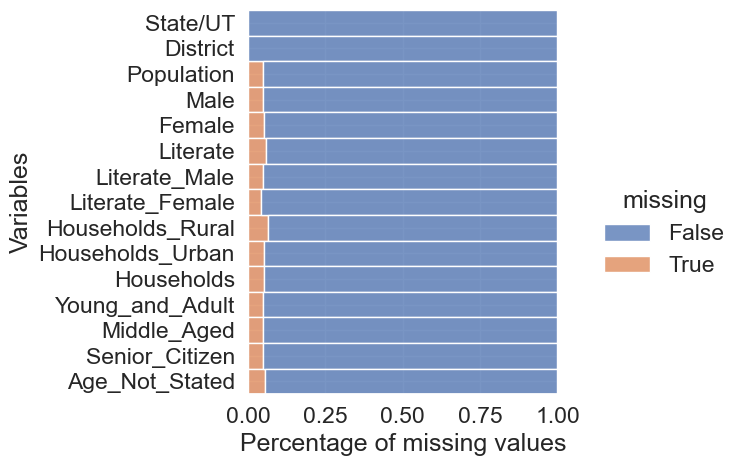

In [70]:
# Create a displot with missing values
sns.displot(
    data=df_copy1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# Change the x-label and y-label
sns.set(font_scale=1.5)
plt.xlabel('Percentage of missing values')
plt.ylabel('Variables')
plt.show()

# Save the plot
#plt.savefig('missing_values_plot.png', dpi=300, bbox_inches='tight')


In [62]:
# Saving the cleaned dataset
missingdata.to_csv('Clean_data/census_clean.csv', index=False)

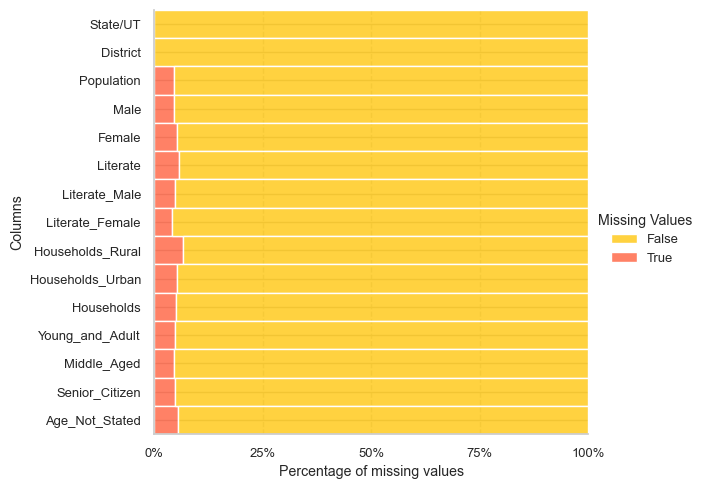

In [76]:
# Create a displot with missing values
plot =sns.displot(
    data=df_copy1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
      height=5,  # adjust the height of the plot
    palette=["#FFC300", "#FF5733"]  # use custom colors
)

# Customize the x-label and y-label
plot.set(xlabel='Percentage of missing values', ylabel='Columns')

# Customize the legend
plot._legend.set_title("Missing Values")
plot._legend.set_bbox_to_anchor([1, 0.5])  # adjust the position of the legend

# Customize the tick labels and grid lines
plot.set(xticks=[0, 0.25, 0.5, 0.75, 1.0], xticklabels=["0%", "25%", "50%", "75%", "100%"])
plot.ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Decrease the font size of the texts
sns.set(font_scale=0.85)
sns.set_style("whitegrid")

# Save the plot as a PNG file
plot.savefig("myplot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
